In [2]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
from scipy.misc import imread, imshow
%matplotlib inline


In [3]:
image = imread('test_image3.jpg')

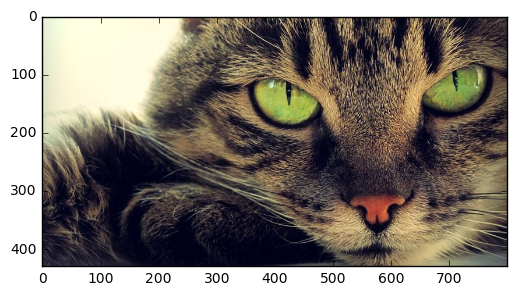

In [4]:
plt.imshow(image)
plt.show()

In [5]:
image.shape

(430, 800, 3)

In [87]:
image[420:429,799]

array([[ 87,  92,  95],
       [ 85,  90,  93],
       [ 91,  96, 100],
       [ 84,  89,  93],
       [ 85,  90,  96],
       [ 87,  92,  98],
       [ 89,  94, 100],
       [ 91,  94, 103],
       [ 92,  95, 104]], dtype=uint8)

In [33]:
kernel = np.ones((5,5))/25
kernel

array([[ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04]])

In [71]:
k_borders = np.ones((3,3))
#k_borders[:, 1] = 0
k_borders[1,1] = 4
k_borders[0,1] = -1
k_borders[2,1] = -1
k_borders[1,0] = -1
k_borders[1,2] = -1

In [9]:
result = np.zeros((430,800,3))
result.shape

(430, 800, 3)

In [11]:
#window = np.transpose(window, axes=(1,0,2))
np.sum(window, axis=(0,1))

NameError: name 'window' is not defined

In [70]:
w = image[0:2,0:1]
w

array([[[231, 239, 216]],

       [[231, 239, 216]]], dtype=uint8)

In [40]:
def cv2d(image_source, K):
    h ,w ,d = image_source.shape
    k_h, k_w = K.shape
    result_h = h - k_h + 1
    result_w = w - k_w +1
    
    result = np.zeros((result_h,result_w,3))
    
    for i in range(result_h):
        for j in range(result_w):
            window = image_source[i:i+k_h, j:j+k_w, :]
            temp = np.transpose(window, axes = (2,0,1))
            result[i,j] = np.sum(np.multiply(temp, K),  axis = (1,2))
    return result
            


In [72]:
result = cv2d(image, k_borders)

In [95]:
result[0:20,550,0] 

array([ 102.,   86.,   92.,  114.,  144.,  146.,  139.,   98.,  141.,
         98.,   33.,   80.,  109.,   75.,   97.,  144.,  128.,  167.,
        260.,  293.])

In [117]:
result[:,0,0] 
r = (result>125)*255


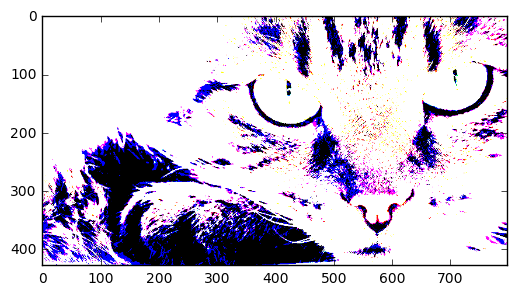

In [121]:
plt.imshow(r.astype(np.uint8))